In [4]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white") # change the default seaborn graphics style 
%matplotlib inline

In [10]:
#datas import
# dropna() allows us to delete countries we don't have all the informations
WGI = pandas.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv").dropna()
WGI

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
5,Albania,ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758
...,...,...,...,...,...,...,...,...
209,Serbia,SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
210,South Africa,ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
211,"Congo, Dem. Rep.",ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
212,Zambia,ZMB,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


In [11]:
#HAC (hierarchical agglomerative clustering )

from sklearn.cluster import AgglomerativeClustering

WGI_num = WGI.drop(columns = ["Country", "Code"])
#first we don't want to define a number of clusters and we want to keep all the hierarchy
#which means : 0 for distance_threshold and none for n_cluster
hac = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
hac.fit(WGI_num)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

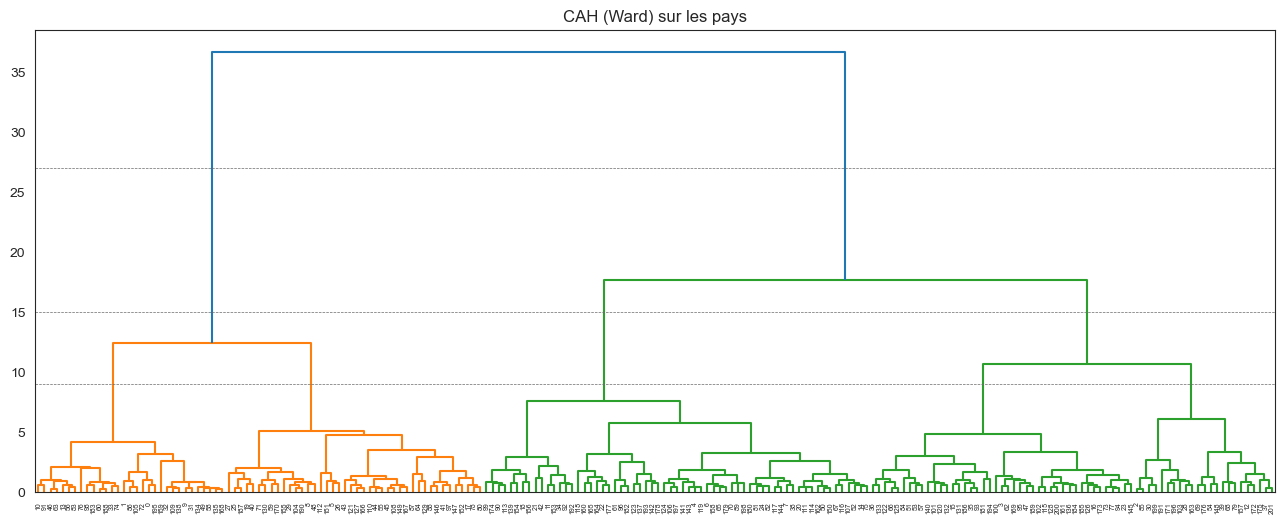

In [13]:
#dendogram
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plt.figure(figsize = (16, 6))
plt.title("CAH (Ward) sur les pays")
# plot the top three levels of the dendrogram
plot_dendrogram(hac)
plt.axhline(y = 27, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 15, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 9, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()
#suggests 2 or 3 clusters because there is a big trop between the second and third clusters, and between the third and fourth clusters
# slighter drop between the fourth and fifth clusters

In [25]:
#let's try now with 2 clusters
hac2 = AgglomerativeClustering(n_clusters = 2)
hac2.fit(WGI_num)
pandas.DataFrame(hac2.labels_, columns = ["Cluster"]).assign(Count = 1).groupby("Cluster").count()
#give us the repartition of countries between the 2 clusters

,Count
Cluster,
0,129
1,73


In [26]:
WGI_num.assign(Cluster = hac2.labels_).groupby("Cluster").mean()
#means values for each variable and each cluster

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
Cluster,,,,,,
0,-0.498394,-0.536321,-0.615752,-0.603835,-0.633716,-0.641430
1,0.854999,0.824537,1.006136,0.996369,1.032080,1.023469


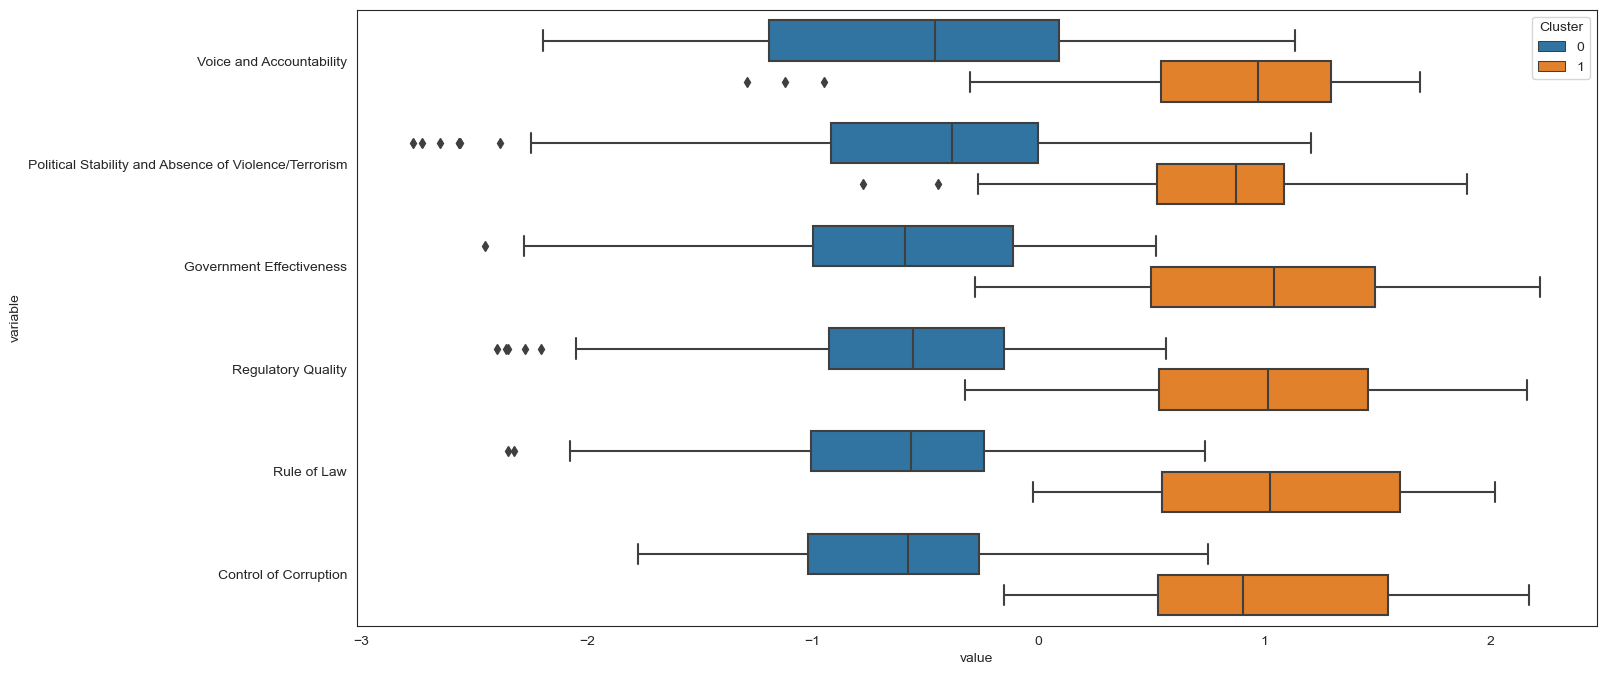

In [19]:
#boxplot for each variable and each cluster
plt.figure(figsize = (16, 8))
df = pandas.melt(WGI_num.assign(Cluster = hac2.labels_), id_vars = 'Cluster')
seaborn.boxplot(data = df, y = "variable", x = "value", hue = "Cluster")
plt.show()

In [31]:
#let's try now with 3 clusters
hac3 = AgglomerativeClustering(n_clusters = 3)
hac3.fit(WGI_num)
pandas.DataFrame(hac3.labels_, columns = ["Cluster"]).assign(Effectif = 1).groupby("Cluster").count()
#give us the repartition of countries between the 3 clusters

,Effectif
Cluster,
0,73
1,66
2,63


In [32]:
WGI_num.assign(Cluster = hac3.labels_).groupby("Cluster").mean()
#means values for each variable and each cluster

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
Cluster,,,,,,
0,0.854999,0.824537,1.006136,0.996369,1.032080,1.023469
1,-0.959242,-1.062068,-1.052668,-0.990906,-1.041426,-1.029118
2,-0.015602,0.014461,-0.158030,-0.198332,-0.206592,-0.235281


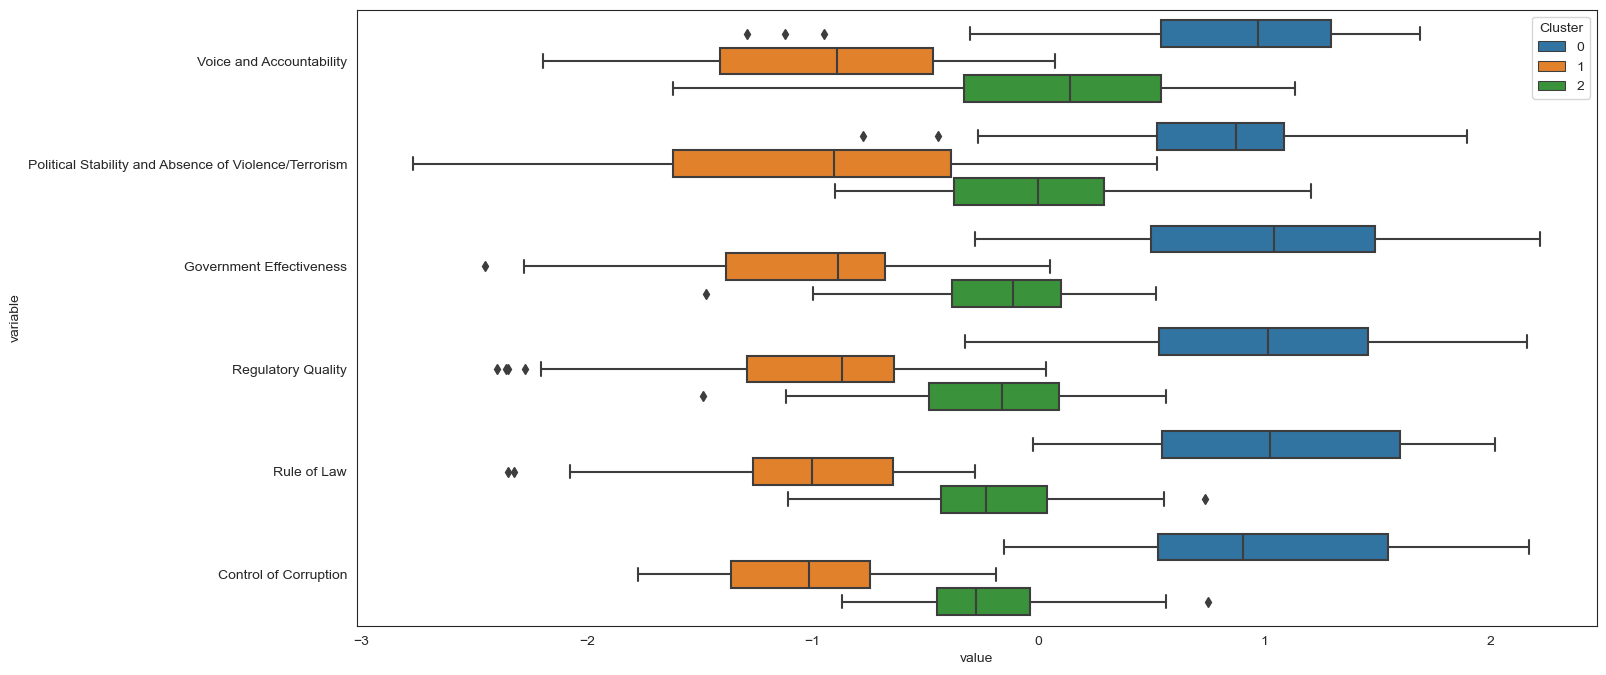

In [23]:
plt.figure(figsize = (16, 8))
df = pandas.melt(WGI_num.assign(Cluster = hac3.labels_), id_vars = 'Cluster')
seaborn.boxplot(data = df, y = "variable", x = "value", hue = "Cluster")
plt.show()
#boxplot for each variable and each cluster

In [27]:
#We can use k-means to decide of the number of clusters
#K-means
#2 clusters
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(WGI_num)
#clusters count
pandas.DataFrame(kmeans2.labels_, columns = ["Cluster"]).assign(Count = 1).groupby("Cluster").count()

C:\Users\33665\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Count
Cluster,
0,120
1,82


In [28]:
#means values for each variable and each cluster
kmeans2.cluster_centers_
WGI_num.assign(Cluster = kmeans2.labels_).groupby("Cluster").mean()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
Cluster,,,,,,
0,-0.586609,-0.630458,-0.666734,-0.638075,-0.701083,-0.699567
1,0.835551,0.812936,0.902733,0.870845,0.947833,0.925814


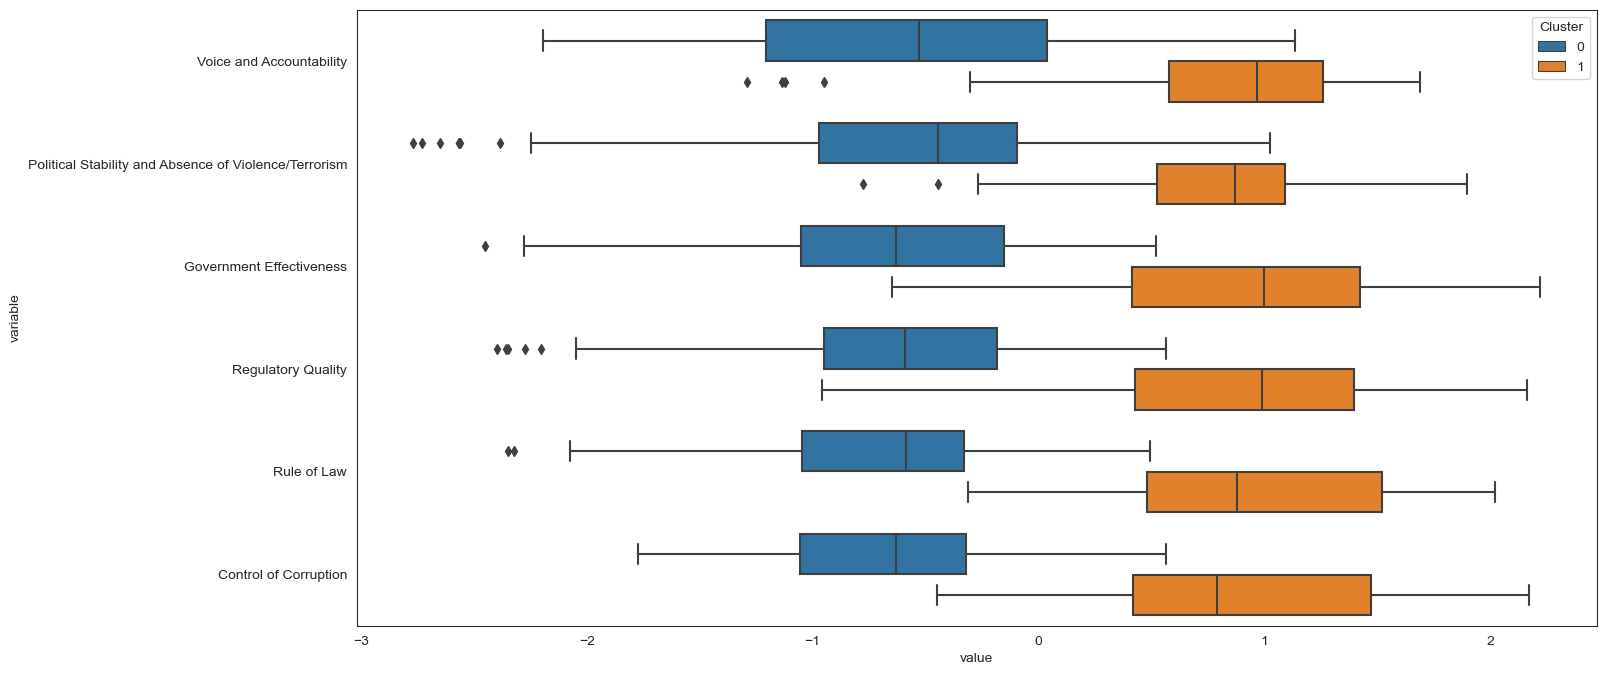

In [29]:
#boxplot for each variable and each cluster
plt.figure(figsize = (16, 8))
df = pandas.melt(WGI_num.assign(Cluster = kmeans2.labels_), id_vars = 'Cluster')
seaborn.boxplot(data = df, y = "variable", x = "value", hue = "Cluster")
plt.show()

In [30]:
#3 clusters
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(WGI_num)
#clusters count
pandas.DataFrame(kmeans3.labels_, columns = ["Cluster"]).assign(Effectif = 1).groupby("Cluster").count()

C:\Users\33665\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Effectif
Cluster,
0,49
1,66
2,87


In [33]:
#means values for each variable and each cluster
WGI_num.assign(Cluster = kmeans3.labels_).groupby("Cluster").mean()

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
Cluster,,,,,,
0,1.020859,0.889478,1.344081,1.338705,1.327762,1.272946
1,-0.992739,-1.075007,-1.030913,-0.981857,-1.049120,-1.033342
2,0.156560,0.211170,-0.043721,-0.068433,-0.025587,-0.025345


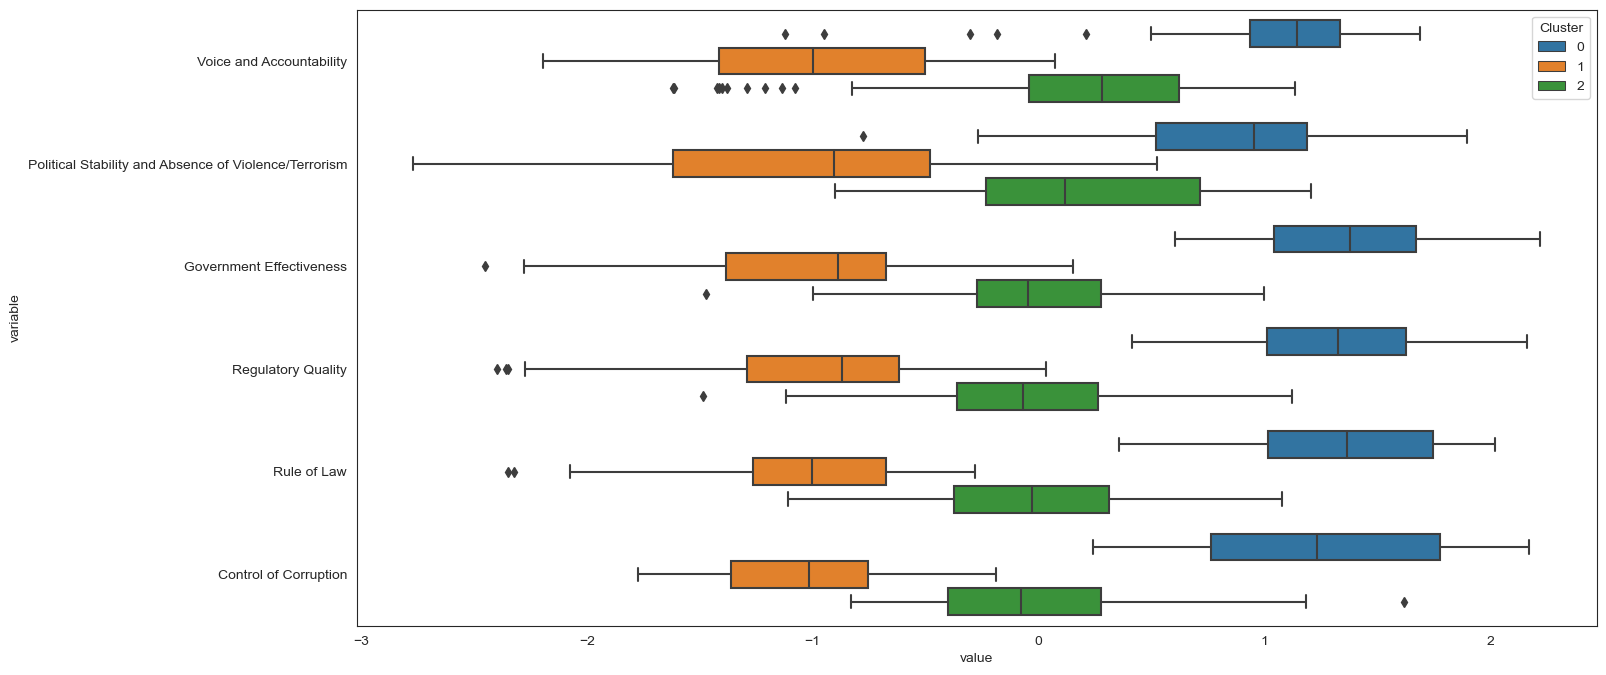

In [34]:
#boxplot for each variable and each cluster
plt.figure(figsize = (16, 8))
df = pandas.melt(WGI_num.assign(Cluster = kmeans3.labels_), id_vars = 'Cluster')
seaborn.boxplot(data = df, y = "variable", x = "value", hue = "Cluster")
plt.show()

C:\Users\33665\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\33665\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\33665\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\33665\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

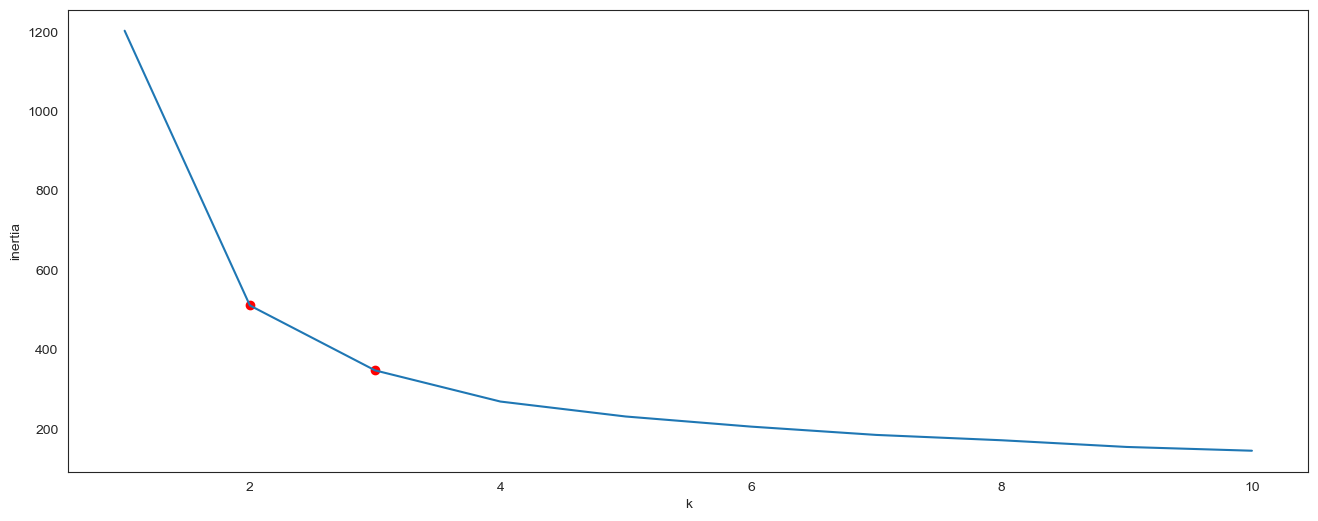

In [37]:
#choice of the number of clusters with k-means
#evolution curve, intra-class inertia which represents the disparities of individuals within the same cluster
plt.figure(figsize = (16, 6))
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(WGI_num)
    inertia = inertia + [kmeans.inertia_]
inertia = pandas.DataFrame({"k": range(1, 11), "inertia": inertia})
seaborn.lineplot(data = inertia, x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(3, inertia.query('k == 3')["inertia"], c = "red")
plt.show()

In [ ]:
#on seek the inflection point of this curve
#the most striking is the one at 2, it looks better to choose 2 clusters
#even though the one at 3 could also work because there is a break point, slighter than the one at 2